In [1]:
import pandas as pd
data_path = "../trailing_avg_diff_V2.csv"
dataframe = pd.read_csv(data_path, header=0, index_col = 0)

In [2]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
%matplotlib inline

Using TensorFlow backend.


In [3]:
dataframe['Wloc'].replace(to_replace=['H', 'A', 'N'], value=['0', '1', '2'], inplace=True)

In [4]:
from collections import Counter
t1_count = Counter(dict(dataframe['team1'].value_counts()))
t1_count

Counter({1112: 479, 1103: 445, 1130: 443, 1104: 441, 1107: 440, 1139: 436, 1153: 432, 1110: 431, 1163: 428, 1133: 427, 1124: 418, 1122: 416, 1125: 415, 1150: 414, 1140: 412, 1181: 412, 1116: 411, 1126: 410, 1129: 409, 1113: 405, 1111: 402, 1102: 401, 1114: 401, 1196: 399, 1211: 398, 1145: 395, 1228: 395, 1142: 394, 1174: 393, 1173: 391, 1166: 390, 1155: 389, 1123: 388, 1143: 383, 1127: 378, 1148: 377, 1151: 375, 1164: 375, 1106: 373, 1152: 370, 1120: 369, 1105: 368, 1144: 368, 1135: 363, 1160: 363, 1193: 362, 1117: 361, 1180: 361, 1156: 360, 1170: 360, 1222: 358, 1132: 357, 1131: 356, 1231: 356, 1242: 356, 1168: 354, 1119: 353, 1182: 350, 1108: 348, 1176: 346, 1137: 345, 1138: 344, 1192: 343, 1177: 342, 1186: 342, 1149: 338, 1234: 337, 1207: 336, 1187: 333, 1194: 333, 1206: 333, 1175: 332, 1158: 331, 1200: 331, 1161: 330, 1179: 330, 1183: 329, 1199: 327, 1201: 325, 1169: 323, 1235: 323, 1233: 322, 1162: 321, 1184: 320, 1236: 319, 1178: 318, 1154: 316, 1258: 315, 1190: 313, 1172: 312, 1

In [5]:
t2_count = Counter(dict(dataframe['team2'].value_counts()))
t2_count

Counter({1458: 480, 1462: 474, 1452: 456, 1455: 450, 1437: 445, 1443: 440, 1435: 431, 1436: 430, 1431: 426, 1444: 426, 1448: 424, 1450: 422, 1433: 419, 1449: 417, 1461: 415, 1393: 414, 1456: 414, 1447: 413, 1411: 411, 1389: 406, 1403: 406, 1457: 405, 1459: 404, 1460: 398, 1429: 397, 1416: 394, 1464: 394, 1388: 393, 1451: 392, 1439: 391, 1401: 389, 1463: 386, 1404: 382, 1396: 379, 1412: 375, 1427: 375, 1345: 374, 1373: 373, 1420: 372, 1428: 372, 1438: 372, 1441: 372, 1391: 371, 1442: 370, 1425: 369, 1424: 368, 1405: 367, 1354: 364, 1387: 364, 1423: 364, 1415: 362, 1397: 361, 1414: 361, 1384: 359, 1399: 358, 1409: 358, 1417: 357, 1418: 357, 1400: 355, 1426: 353, 1454: 353, 1380: 351, 1386: 351, 1419: 350, 1325: 347, 1351: 342, 1356: 341, 1383: 341, 1365: 340, 1392: 339, 1385: 337, 1398: 336, 1376: 334, 1440: 332, 1406: 331, 1408: 330, 1326: 327, 1434: 327, 1313: 326, 1422: 323, 1298: 322, 1314: 321, 1366: 319, 1382: 319, 1421: 318, 1320: 317, 1336: 315, 1357: 315, 1407: 311, 1430: 311, 1

In [6]:
print(t1_count + t2_count)

Counter({1181: 500, 1242: 500, 1246: 498, 1314: 498, 1277: 494, 1196: 490, 1257: 486, 1393: 485, 1458: 485, 1163: 484, 1272: 482, 1326: 482, 1112: 479, 1400: 478, 1462: 475, 1228: 474, 1338: 473, 1417: 471, 1437: 471, 1211: 469, 1433: 469, 1301: 465, 1452: 463, 1323: 460, 1266: 459, 1345: 458, 1139: 457, 1153: 457, 1332: 457, 1397: 457, 1166: 456, 1276: 456, 1328: 456, 1173: 455, 1268: 455, 1329: 455, 1449: 454, 1231: 453, 1281: 453, 1455: 453, 1435: 450, 1140: 449, 1280: 449, 1386: 449, 1130: 448, 1143: 448, 1199: 448, 1396: 448, 1424: 448, 1207: 447, 1234: 447, 1235: 447, 1325: 447, 1330: 447, 1403: 447, 1210: 446, 1261: 446, 1390: 446, 1425: 446, 1103: 445, 1116: 445, 1350: 445, 1401: 445, 1206: 444, 1279: 444, 1436: 444, 1233: 443, 1243: 443, 1274: 443, 1278: 443, 1307: 443, 1443: 443, 1320: 442, 1373: 442, 1104: 441, 1310: 441, 1412: 441, 1448: 441, 1107: 440, 1356: 440, 1245: 439, 1284: 439, 1308: 439, 1352: 439, 1428: 439, 1429: 439, 1438: 439, 1125: 438, 1214: 438, 1344: 438, 1

In [7]:
d1 = dataframe.loc[dataframe['team1'] == 1242]
#d2 = dataframe.loc[dataframe['team2'] == 1181]
d1

,Daynum,team1,team2,Wloc,Numot,score_diff,fgm_diff,fga_diff,fgm3_diff,fga3_diff,ftm_diff,fta_diff,or_diff,dr_diff,ast_diff,to_diff,stl_diff,blk_diff,pf_diff,WorL
Season,,,,,,,,,,,,,,,,,,,,
2003,18,1242,1422,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1
2003,23,1242,1314,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0
2003,33,1242,1332,2,0,0.117134,0.174545,0.064395,0.511111,0.384320,-0.688889,-0.769231,-0.676282,-0.098079,0.106952,-3.247354e-01,0.418519,0.347222,0.143230,0
2003,37,1242,1409,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1
2003,47,1242,1417,0,0,0.127139,0.081460,-0.118267,0.331481,0.170030,-0.076190,0.165572,-0.468519,0.055556,0.279685,-1.123932e-01,0.018939,0.138889,-0.359452,1
2003,59,1242,1421,0,0,0.408665,0.470843,0.144599,0.291667,0.197236,0.138889,0.242393,-0.188889,0.225141,0.715610,-1.129386e+00,0.589474,0.600529,-0.046814,1
2003,61,1242,1282,2,0,0.263047,0.287385,0.117878,0.324675,0.243081,-0.184641,-0.640795,-0.230303,0.150306,0.454056,-2.888889e-01,0.380952,0.133333,-0.162309,1
2003,68,1242,1304,0,0,0.203431,0.194357,0.051866,0.186147,0.060852,0.162671,0.130720,-0.471861,-0.035352,0.325926,-5.797980e-01,0.180556,0.491667,-0.133127,1
2003,72,1242,1461,0,0,0.168361,0.219474,0.162312,0.175000,-0.048246,-0.132456,-0.178372,0.153199,0.053236,0.292763,-2.738791e-01,0.252101,0.343519,-0.039798,1


In [8]:
d2 = dataframe.loc[dataframe['team2'] == 1242]
d2

,Daynum,team1,team2,Wloc,Numot,score_diff,fgm_diff,fga_diff,fgm3_diff,fga3_diff,ftm_diff,fta_diff,or_diff,dr_diff,ast_diff,to_diff,stl_diff,blk_diff,pf_diff,WorL
Season,,,,,,,,,,,,,,,,,,,,
2003,15,1221,1242,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2003,25,1196,1242,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2003,54,1143,1242,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2003,63,1235,1242,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2003,79,1160,1242,0,0,0.068676,0.128910,-0.092635,0.294444,0.026425,-0.655556,-0.627451,-0.676282,0.102679,0.037255,-0.000926,0.129630,0.180556,0.102205,1
2003,82,1112,1242,1,0,0.090588,0.053641,-0.148562,0.083333,-0.158810,0.038647,-0.062455,-0.394231,0.225694,-0.021569,0.074074,-0.092593,-0.472222,-0.102977,1
2003,99,1124,1242,1,0,0.282814,0.382210,0.059939,-0.652381,-1.018445,0.039683,0.001425,-0.326984,0.263675,0.325873,-0.647222,0.185185,0.440476,0.001754,0
2003,104,1235,1242,0,0,0.204205,0.162637,-0.120494,-0.372222,-0.550738,0.539174,0.526050,-0.166667,0.219281,0.386800,-0.092810,0.509524,0.302778,-0.261905,0
2003,107,1160,1242,0,0,0.080403,0.048691,0.037278,-0.043651,0.079731,0.041126,0.074851,0.112573,-0.037037,0.385730,-0.205128,0.254375,-0.697619,-0.156433,0


In [9]:
#dataset = dataframe.loc[dataframe['team2'] == 1458]
dataset = pd.concat([d1, d2])
dataset.sort_values(by = ['Daynum'], ascending=True)
dataset

,Daynum,team1,team2,Wloc,Numot,score_diff,fgm_diff,fga_diff,fgm3_diff,fga3_diff,ftm_diff,fta_diff,or_diff,dr_diff,ast_diff,to_diff,stl_diff,blk_diff,pf_diff,WorL
Season,,,,,,,,,,,,,,,,,,,,
2003,18,1242,1422,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2003,23,1242,1314,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2003,33,1242,1332,2,0,0.117134,0.174545,0.064395,0.511111,0.384320,-0.688889,-0.769231,-0.676282,-0.098079,0.106952,-0.324735,0.418519,0.347222,0.143230,0
2003,37,1242,1409,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2003,47,1242,1417,0,0,0.127139,0.081460,-0.118267,0.331481,0.170030,-0.076190,0.165572,-0.468519,0.055556,0.279685,-0.112393,0.018939,0.138889,-0.359452,1
2003,59,1242,1421,0,0,0.408665,0.470843,0.144599,0.291667,0.197236,0.138889,0.242393,-0.188889,0.225141,0.715610,-1.129386,0.589474,0.600529,-0.046814,1
2003,61,1242,1282,2,0,0.263047,0.287385,0.117878,0.324675,0.243081,-0.184641,-0.640795,-0.230303,0.150306,0.454056,-0.288889,0.380952,0.133333,-0.162309,1
2003,68,1242,1304,0,0,0.203431,0.194357,0.051866,0.186147,0.060852,0.162671,0.130720,-0.471861,-0.035352,0.325926,-0.579798,0.180556,0.491667,-0.133127,1
2003,72,1242,1461,0,0,0.168361,0.219474,0.162312,0.175000,-0.048246,-0.132456,-0.178372,0.153199,0.053236,0.292763,-0.273879,0.252101,0.343519,-0.039798,1


In [10]:
dataset.reset_index(inplace=True)

In [11]:
dataset.sort_values(by = ['Season', 'Daynum'], inplace=True)
#dataset.sort_values(by = ['Season'])
dataset

,Season,Daynum,team1,team2,Wloc,Numot,score_diff,fgm_diff,fga_diff,fgm3_diff,...,ftm_diff,fta_diff,or_diff,dr_diff,ast_diff,to_diff,stl_diff,blk_diff,pf_diff,WorL
356,2003,15,1221,1242,0,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
0,2003,18,1242,1422,0,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
1,2003,23,1242,1314,2,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
357,2003,25,1196,1242,2,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,2003,33,1242,1332,2,0,0.117134,0.174545,0.064395,0.511111,...,-0.688889,-0.769231,-0.676282,-0.098079,0.106952,-0.324735,0.418519,0.347222,0.143230,0
3,2003,37,1242,1409,1,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
4,2003,47,1242,1417,0,0,0.127139,0.081460,-0.118267,0.331481,...,-0.076190,0.165572,-0.468519,0.055556,0.279685,-0.112393,0.018939,0.138889,-0.359452,1
358,2003,54,1143,1242,2,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
5,2003,59,1242,1421,0,0,0.408665,0.470843,0.144599,0.291667,...,0.138889,0.242393,-0.188889,0.225141,0.715610,-1.129386,0.589474,0.600529,-0.046814,1
6,2003,61,1242,1282,2,0,0.263047,0.287385,0.117878,0.324675,...,-0.184641,-0.640795,-0.230303,0.150306,0.454056,-0.288889,0.380952,0.133333,-0.162309,1


In [12]:
dataset.shape

(500, 21)

In [13]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    # data: Sequence of observations as a list or 2D NumPy array. Required.
    # n_in: Number of lag observations as input (X). Values may be between [1..len(data)] Optional. Defaults to 1.
    #### window time series analysis: set n_in as 2, 3, ...
    # n_out: Number of observations as output (y). Values may be between [0..len(data)-1]. Optional. Defaults to 1.
    #### using past observations to forecast a sequence of future observations: multi-step, set n_in & n_out as 2, 3, ...
    # dropnan: Boolean whether or not to drop rows with NaN values. Optional. Defaults to True.
    #### Multi-variate forecasting: call this function on a dataframe as data
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data) 
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    #### Given a DataFrame, the shift() function can be used to create copies of columns 
    #### that are pushed forward (rows of NaN values added to the front) or pulled back 
    #### (rows of NaN values added to the end).
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    # return: Pandas DataFrame of series framed for supervised learning.
    return agg

In [14]:
values = dataset.values
# encode wind_dir as integer
encoder = LabelEncoder()
values[:,6] = encoder.fit_transform(values[:,6])
# coerce all data into float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1        0.0   0.073333   0.844444   0.000000        0.0        0.0   
2        0.0   0.093333   1.000000   0.814480        0.0        0.0   
3        0.0   0.126667   1.000000   0.325792        1.0        0.0   
4        0.0   0.140000   0.659259   0.000000        1.0        0.0   
5        0.0   0.193333   1.000000   0.407240        1.0        0.0   

   var7(t-1)  var8(t-1)  var9(t-1)  var17(t-1)    ...     var12(t)  var13(t)  \
1   0.000000   0.330037   0.596608    0.715991    ...     0.489528  0.551686   
2   0.000000   0.330037   0.596608    0.715991    ...     0.489528  0.551686   
3   0.000000   0.330037   0.596608    0.715991    ...     0.489528  0.551686   
4   0.000000   0.330037   0.596608    0.715991    ...     0.020187  0.000000   
5   0.365112   0.578397   0.702857    0.537139    ...     0.489528  0.551686   

   var14(t)  var15(t)  var16(t)  var17(t)  var18(t)  var19(t)  var20(t)  \
1  0.716845  0.40

In [16]:
# split into train and test sets
values = reframed.values
n_train_hours = 450
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(450, 1, 34) (450,) (49, 1, 34) (49,)


In [17]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM
from matplotlib import pyplot as plt

Train on 450 samples, validate on 49 samples
Epoch 1/100
3s - loss: 0.6532 - acc: 0.6267 - val_loss: 0.6212 - val_acc: 0.6327
Epoch 2/100
2s - loss: 0.6168 - acc: 0.6600 - val_loss: 0.5777 - val_acc: 0.7551
Epoch 3/100
2s - loss: 0.5749 - acc: 0.7133 - val_loss: 0.5596 - val_acc: 0.7959
Epoch 4/100
2s - loss: 0.5427 - acc: 0.7422 - val_loss: 0.5534 - val_acc: 0.8163
Epoch 5/100
2s - loss: 0.5487 - acc: 0.7267 - val_loss: 0.5469 - val_acc: 0.7755
Epoch 6/100
2s - loss: 0.5404 - acc: 0.7489 - val_loss: 0.5413 - val_acc: 0.7755
Epoch 7/100
2s - loss: 0.5518 - acc: 0.7533 - val_loss: 0.5514 - val_acc: 0.7959
Epoch 8/100
2s - loss: 0.5348 - acc: 0.7733 - val_loss: 0.5405 - val_acc: 0.7347
Epoch 9/100
2s - loss: 0.5434 - acc: 0.7422 - val_loss: 0.5354 - val_acc: 0.7347
Epoch 10/100
2s - loss: 0.5321 - acc: 0.7489 - val_loss: 0.5351 - val_acc: 0.7551
Epoch 11/100
2s - loss: 0.5235 - acc: 0.7600 - val_loss: 0.5305 - val_acc: 0.7347
Epoch 12/100
2s - loss: 0.5210 - acc: 0.7533 - val_loss: 0.532

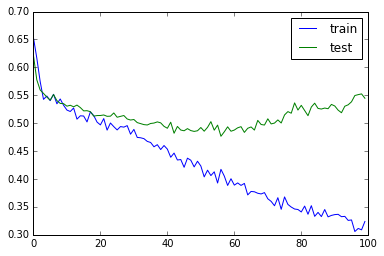

In [18]:
# design network
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=1, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [19]:
# Final evaluation of the model
scores = model.evaluate(test_X, test_y, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 79.59%
